In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import hangul_font
%matplotlib inline

Hangul font is set!


### 텍스트 데이터  확인

In [59]:
train.loc[5792]

n_id                                               NEWS06504
date                                                20200304
title            [퀵리포트] S-Oil, "매수" 유지..목표가 22%↓ 8만5000원-한투證
content    전일 종가 기준 주가순자산배수(PBR)는 1.19배, 자기자본이익률(ROE)은 -4...
ord                                                        5
info                                                       0
Name: 5792, dtype: object

In [70]:
train[train['content']=='메디톡스, 메디톡신 허가 취소 소식에 급락']

,n_id,date,title,content,ord,info
53448,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,"메디톡스, 메디톡신 허가 취소 소식에 급락",24,1


In [71]:
train[train['n_id']=='NEWS09833']

,n_id,date,title,content,ord,info
53425,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,국내 대표 보툴리눔 톡신 기업 메디톡스가 '메디톡신'의 허가 취소로 창사 이래 최대...,1,0
53426,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,안팎의 어려움에 둘러싸인 메디톡스가 이번 사태를 극복할 수 있을지 주목된다,2,0
53427,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,"메디톡신은 2006년 3월 식품의약품안전처의 판매허가를 받은 보툴리눔 톡신 제제로,...",3,0
53428,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,"지난해 사업보고서에 따르면, 메디톡스는 연결 매출 2066억 원 중 93.1%에 해...",4,0
53429,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,이중 메디톡신의 매출 비중은 42%에 달하는 것으로 추정된다,5,0
53430,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,"메디톡스는 차세대 보툴리눔 톡신 제제 '이노톡스'와 '코어톡스'를 내놨지만, 아직 ...",6,0
53431,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,메디톡신이 빠지면 당장 대규모 매출 타격이 불가피하다,7,0
53432,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,허가취소가 막대한 기업 이미지 손실을 불러온다는 점에서 필러 사업도 악영향을 받을 ...,8,0
53433,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,지난해 4분기 적자를 낸 메디톡스는 신종 코로나바이러스 감염증(코로나19) 여파로 ...,9,0
53434,NEWS09833,20200618,메디톡신 결국 퇴출…'창사이래 최대 위기' 메디톡스의 돌파구는?,중국에서 진행 중인 메디톡신(중국 제품명 뉴로녹스) 시판 허가도 차질을 빚을 것으로...,10,0


In [2]:
# train data

train = pd.read_csv('news_train.csv')
train.head(60)

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
5,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 T...,2,0
6,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라...",3,0
7,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","6개 권역에서의 현장행사와 온·오프라인 판촉, TV홈쇼핑 등 연계행사를 통해 소비심...",4,0
8,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",이번 동행세일에서는 롯데·공영·CJ·현대·GS·NS·홈앤쇼핑 등 7개 TV 홈쇼핑사...,5,0
9,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","동행세일 기간 중 홈쇼핑사에서는 판매방송 사이에 영상을 노출하는 방식(SB, sta...",6,0


In [3]:
# test data

test_df = pd.read_csv('news_test.csv')
test_df.head(50)

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5
5,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",사업부문은 반도체·레이저 장비 단일 사업부로 구성돼 있고 매출 유형은 반도체 제조용...,6,NEWS00237_6
6,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",관련 업계에 따르면 이 회사는 최근 마이크로 LED TV 관련 장비의 양산에 돌입했습니다,7,NEWS00237_7
7,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",에어팟 등 무선이어폰용 레이저 컷팅 장비도 공급하기 시작했습니다,8,NEWS00237_8
8,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",코세스 측은 고객사와의 비밀 유지 조항이 있다며 구체적인 사항에 대해서는 알릴 수 ...,9,NEWS00237_9
9,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",하지만 코세스 주가는 지난달 21.4% 상승한 뒤 이달 들어서도 이미 16% 넘게 ...,10,NEWS00237_10


In [64]:
# 비정보가 포함된 row 출력

df1=train[train['info']==1]
df1

,n_id,date,title,content,ord,info
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
16,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",13,1
17,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",14,1
42,NEWS07691,20200518,13년만에 늦깎이 개발 '양주 회천' 봄볕 드나,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",24,1
...,...,...,...,...,...,...
118740,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,48,1
118741,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,49,1
118742,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,50,1
118743,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,51,1


In [68]:
#  비정보가 포함된 content의 갯수

df2 = pd.DataFrame(df1['content'].value_counts()).reset_index()
#.reset_index()
df2.head(50)

,index,content
0,2020년 한국 TV 2대중 1대 인터넷 연결된다,2420
1,업계 최저금리 2.29%. 100%한종목 투자가능+신용/ 미수 대환가능,2420
2,"""주식카톡방"" 대박주를 추천받는데 100원도 안낸다~",2420
3,10%수익을 40%로 만들어 준다고.. 영웅스탁론이라면 가능~.효과적인 레버리지를 ...,2420
4,똑똑해진 소비자..한국도 이젠 소형차 시대,2420
5,아직도 추천주를 돈내고 받으세요.,2420
6,정치테마 매집+거래량+핵심인맥 당장 줄상한가 가도 책임안집니다,2180
7,저평가+실적+재료 받쳐주는 바이오 대장株. 2020년 한 종목으로 끝,2180
8,최종목표 1000% 이상 함께 도전할 분 모집 여기 클릭,2180
9,오늘 사면 내일 터지는 상한가. (100%무료공개) => (CLICK),2180


In [69]:
df2[df2['content']==1]

,index,content
1338,"""이재용, 틀리지 않았다""삼성의 자신감",1
1339,"오늘 세미콘라이트(30.0%), 한진칼(29.9%) 강세 이유는.",1
1340,4.15 총선 테마 수혜주 TOP 10 (무료 확인),1
1341,디지털대성(068930) 수익률 45% 달성,1
1342,4개 증권유관기관들 맞손7600억 규모 증안펀드 조성,1
...,...,...
5789,두산밥캣에스디시스템포스링크 등,1
5790,"""앞으론 사실혼 부부도"" 서울시 '파격 정책'",1
5791,"CJ푸드빌 뚜레쥬르, 치즈방앗간 출시 한달 30만개 판매",1
5792,"메디톡스, 메디톡신 허가 취소 소식에 급락",1


In [67]:
#  content 중 정보와 비정보의 갯수

df3 = pd.DataFrame(train['info'].value_counts()).reset_index()
df3.head(50)

,index,info
0,0,71813
1,1,46932


### 자연어 EDA

In [17]:
reviews = list(train['content'])
reviews

['[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도',
 '"실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개',
 '하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시',
 '종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지',
 '전국적인 소비 붐 조성에 기여할 예정',
 '[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 TV홈쇼핑사가 홍보와 판매에 동참한다고 26일 밝혔다',
 '대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라는 새로운 형태의 소비촉진 행사다',
 '6개 권역에서의 현장행사와 온·오프라인 판촉, TV홈쇼핑 등 연계행사를 통해 소비심리를 진작하기 위함이다',
 '이번 동행세일에서는 롯데·공영·CJ·현대·GS·NS·홈앤쇼핑 등 7개 TV 홈쇼핑사가 동행세일의 홍보와 방송 판매에 동참해 전국적인 소비 붐 조성에 기여한다',
 '동행세일 기간 중 홈쇼핑사에서는 판매방송 사이에 영상을 노출하는 방식(SB, station break)을 통해 행사 취지와 메시지를 홍보한다',
 '첫 방송으로 6월 26일부터 공영홈쇼핑은 마스크, 식기세트 등 생활용품과 신선식품 등의 17개 제품을 최대 50% 할인된 가격으로 판매하고 이어서 6개 민간 홈쇼핑사들도 동행세일 판매방송에 동참할 계획이다',
 '특히 롯데홈쇼핑은 6월 26일 부산 벡스코에서 현장 이원 생방송을 통해 동행세일 현장을 국민에게 생생하게 전달했다',
 '박영선 중기부 장관이 쇼호스트로 깜짝 등장해 동행세일을 마련한 취지와 대한민국 중소기업 발전을 위한 앞으로의 계획 등을 밝히기도 했다',
 '현장 이원 생방송의 다음 주자로는, 공영홈쇼핑이 7월 10일부터 12일까지 서울 코엑스에서 이원 현장 생방송을 통해 동행세일의 마지막을 장식한다',
 '박영선 장관은 이번 동행세일 행사에 TV홈쇼핑사의 동참을 통해 내수 활성화에 한발짝 더 가까워질 수 있었다며 앞으로도 동행세일 기

In [18]:
# 텍스트 데이터 단어로 변경

tokenized_reviews = [r.split() for r in reviews]
tokenized_reviews

[['[이데일리', 'MARKETPOINT]15:32', '현재', '코스닥', '기관', '678억', '순매도'],
 ['"실적기반"', '저가에', '매집해야', '할', '8월', '급등유망주', 'TOP', '5', '전격공개'],
 ['하이스탁론,', '선취수수료', '없는', '월', '0.4%', '최저금리', '상품', '출시'],
 ['종합', '경제정보', '미디어', '이데일리', '-', '무단전재', '&', '재배포', '금지'],
 ['전국적인', '소비', '붐', '조성에', '기여할', '예정'],
 ['[이데일리',
  '권오석',
  '기자]',
  '중소벤처기업부(이하',
  '중기부)는',
  '대한민국',
  '동행세일에',
  '7개',
  'TV홈쇼핑사가',
  '홍보와',
  '판매에',
  '동참한다고',
  '26일',
  '밝혔다'],
 ['대한민국',
  '동행세일은',
  '라이브',
  '커머스,',
  '언택트',
  '콘서트,',
  'O2O',
  '행사',
  '연계',
  '등',
  '비대면이라는',
  '새로운',
  '형태의',
  '소비촉진',
  '행사다'],
 ['6개',
  '권역에서의',
  '현장행사와',
  '온·오프라인',
  '판촉,',
  'TV홈쇼핑',
  '등',
  '연계행사를',
  '통해',
  '소비심리를',
  '진작하기',
  '위함이다'],
 ['이번',
  '동행세일에서는',
  '롯데·공영·CJ·현대·GS·NS·홈앤쇼핑',
  '등',
  '7개',
  'TV',
  '홈쇼핑사가',
  '동행세일의',
  '홍보와',
  '방송',
  '판매에',
  '동참해',
  '전국적인',
  '소비',
  '붐',
  '조성에',
  '기여한다'],
 ['동행세일',
  '기간',
  '중',
  '홈쇼핑사에서는',
  '판매방송',
  '사이에',
  '영상을',
  '노출하는',
  '방식(SB,',
  'station',
  'break)을',
  '통

In [19]:
# 문장 별 단어수 구하기

review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token

[7,
 9,
 8,
 9,
 6,
 14,
 15,
 12,
 17,
 16,
 26,
 15,
 18,
 18,
 31,
 27,
 9,
 8,
 9,
 32,
 16,
 9,
 10,
 10,
 20,
 20,
 15,
 16,
 7,
 12,
 16,
 5,
 18,
 11,
 8,
 13,
 8,
 8,
 18,
 7,
 29,
 33,
 9,
 8,
 9,
 11,
 24,
 49,
 15,
 16,
 23,
 10,
 15,
 20,
 29,
 19,
 35,
 9,
 8,
 9,
 47,
 161,
 9,
 8,
 9,
 15,
 34,
 19,
 9,
 8,
 9,
 17,
 13,
 17,
 24,
 8,
 4,
 19,
 16,
 25,
 12,
 7,
 13,
 5,
 14,
 16,
 9,
 16,
 7,
 9,
 8,
 9,
 5,
 30,
 5,
 98,
 5,
 5,
 9,
 43,
 19,
 41,
 30,
 21,
 30,
 9,
 8,
 9,
 13,
 11,
 17,
 15,
 49,
 17,
 5,
 9,
 8,
 9,
 51,
 8,
 60,
 13,
 5,
 9,
 8,
 9,
 9,
 8,
 30,
 11,
 8,
 3,
 1,
 13,
 7,
 7,
 5,
 9,
 28,
 16,
 16,
 16,
 15,
 17,
 27,
 32,
 18,
 9,
 19,
 43,
 7,
 34,
 8,
 12,
 24,
 24,
 26,
 13,
 46,
 14,
 11,
 7,
 17,
 23,
 13,
 15,
 12,
 30,
 12,
 9,
 8,
 9,
 18,
 24,
 23,
 14,
 19,
 11,
 11,
 22,
 29,
 5,
 20,
 5,
 9,
 8,
 9,
 12,
 35,
 14,
 27,
 23,
 25,
 24,
 19,
 12,
 9,
 32,
 10,
 9,
 8,
 9,
 19,
 35,
 13,
 25,
 30,
 22,
 18,
 30,
 29,
 23,
 18,
 26,
 29,
 1

In [20]:
# 단어 이어 붙이기(알파벳 갯수를 세기 위한)

[s.replace(' ', '') for s in reviews]

['[이데일리MARKETPOINT]15:32현재코스닥기관678억순매도',
 '"실적기반"저가에매집해야할8월급등유망주TOP5전격공개',
 '하이스탁론,선취수수료없는월0.4%최저금리상품출시',
 '종합경제정보미디어이데일리-무단전재&재배포금지',
 '전국적인소비붐조성에기여할예정',
 '[이데일리권오석기자]중소벤처기업부(이하중기부)는대한민국동행세일에7개TV홈쇼핑사가홍보와판매에동참한다고26일밝혔다',
 '대한민국동행세일은라이브커머스,언택트콘서트,O2O행사연계등비대면이라는새로운형태의소비촉진행사다',
 '6개권역에서의현장행사와온·오프라인판촉,TV홈쇼핑등연계행사를통해소비심리를진작하기위함이다',
 '이번동행세일에서는롯데·공영·CJ·현대·GS·NS·홈앤쇼핑등7개TV홈쇼핑사가동행세일의홍보와방송판매에동참해전국적인소비붐조성에기여한다',
 '동행세일기간중홈쇼핑사에서는판매방송사이에영상을노출하는방식(SB,stationbreak)을통해행사취지와메시지를홍보한다',
 '첫방송으로6월26일부터공영홈쇼핑은마스크,식기세트등생활용품과신선식품등의17개제품을최대50%할인된가격으로판매하고이어서6개민간홈쇼핑사들도동행세일판매방송에동참할계획이다',
 '특히롯데홈쇼핑은6월26일부산벡스코에서현장이원생방송을통해동행세일현장을국민에게생생하게전달했다',
 '박영선중기부장관이쇼호스트로깜짝등장해동행세일을마련한취지와대한민국중소기업발전을위한앞으로의계획등을밝히기도했다',
 '현장이원생방송의다음주자로는,공영홈쇼핑이7월10일부터12일까지서울코엑스에서이원현장생방송을통해동행세일의마지막을장식한다',
 '박영선장관은이번동행세일행사에TV홈쇼핑사의동참을통해내수활성화에한발짝더가까워질수있었다며앞으로도동행세일기간내여러기관과유통사들의참여와협업을통해함께위기를극복하기를바란다는포부를밝혔다',
 '한편앞서중기부에따르면지난25일글로벌쇼트비디오앱틱톡(Tiktok)의공익캠페인틱톡포굿(TikTokforGood)의공식누리소통망(SNS)에박영선장관의동행나비챌린지참여영상이올라왔다',
 '"실적기반"저가에매집해야할8월급등유망주TOP5전격공개',
 '하이스탁론,선취수수료없는

In [21]:
# 문장별 알파벳 갯수 구하기

review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
review_len_by_eumjeol

[36,
 29,
 26,
 24,
 15,
 61,
 50,
 47,
 71,
 63,
 89,
 49,
 57,
 63,
 95,
 96,
 29,
 26,
 24,
 104,
 65,
 30,
 36,
 34,
 64,
 92,
 51,
 48,
 22,
 59,
 54,
 16,
 72,
 44,
 23,
 62,
 49,
 30,
 68,
 31,
 116,
 133,
 29,
 26,
 24,
 26,
 77,
 174,
 45,
 48,
 66,
 39,
 52,
 61,
 104,
 74,
 107,
 29,
 26,
 24,
 157,
 649,
 29,
 26,
 24,
 70,
 144,
 63,
 29,
 26,
 24,
 56,
 49,
 55,
 86,
 28,
 14,
 70,
 51,
 79,
 40,
 26,
 41,
 16,
 43,
 59,
 32,
 79,
 19,
 29,
 26,
 24,
 16,
 103,
 15,
 330,
 16,
 69,
 24,
 163,
 70,
 132,
 121,
 76,
 126,
 29,
 26,
 24,
 51,
 49,
 63,
 45,
 195,
 68,
 57,
 29,
 26,
 24,
 157,
 35,
 195,
 39,
 63,
 29,
 26,
 24,
 47,
 34,
 109,
 37,
 60,
 11,
 32,
 33,
 27,
 23,
 17,
 24,
 87,
 59,
 50,
 43,
 50,
 68,
 95,
 120,
 61,
 35,
 66,
 132,
 22,
 106,
 46,
 34,
 77,
 98,
 85,
 37,
 139,
 53,
 34,
 23,
 48,
 67,
 39,
 75,
 41,
 103,
 38,
 29,
 26,
 24,
 65,
 82,
 68,
 44,
 64,
 40,
 33,
 63,
 92,
 18,
 58,
 12,
 29,
 26,
 24,
 43,
 115,
 59,
 95,
 69,
 71,
 80,
 56,


In [23]:
# 단어 컬럼과 단어수 알파벳 수 컬럼 추가

train['reviews'] = tokenized_reviews
train['eumjeol'] = review_len_by_eumjeol
train['token'] = review_len_by_token
train

,n_id,date,title,content,ord,info,reviews,eumjeol,token
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,"[[이데일리, MARKETPOINT]15:32, 현재, 코스닥, 기관, 678억, ...",36,7
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"[""실적기반"", 저가에, 매집해야, 할, 8월, 급등유망주, TOP, 5, 전격공개]",29,9
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"[하이스탁론,, 선취수수료, 없는, 월, 0.4%, 최저금리, 상품, 출시]",26,8
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,"[종합, 경제정보, 미디어, 이데일리, -, 무단전재, &, 재배포, 금지]",24,9
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"[전국적인, 소비, 붐, 조성에, 기여할, 예정]",15,6
...,...,...,...,...,...,...,...,...,...
118740,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,48,1,"[미, FDA, 임상3상, 허가, 임박., 묻고, 따블로, 갈, 바이오, 황제주.]",26,10
118741,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,49,1,"[똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]",19,5
118742,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,50,1,"[똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]",19,5
118743,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,51,1,"[2020년, 한국, TV, 2대중, 1대, 인터넷, 연결된다]",21,7


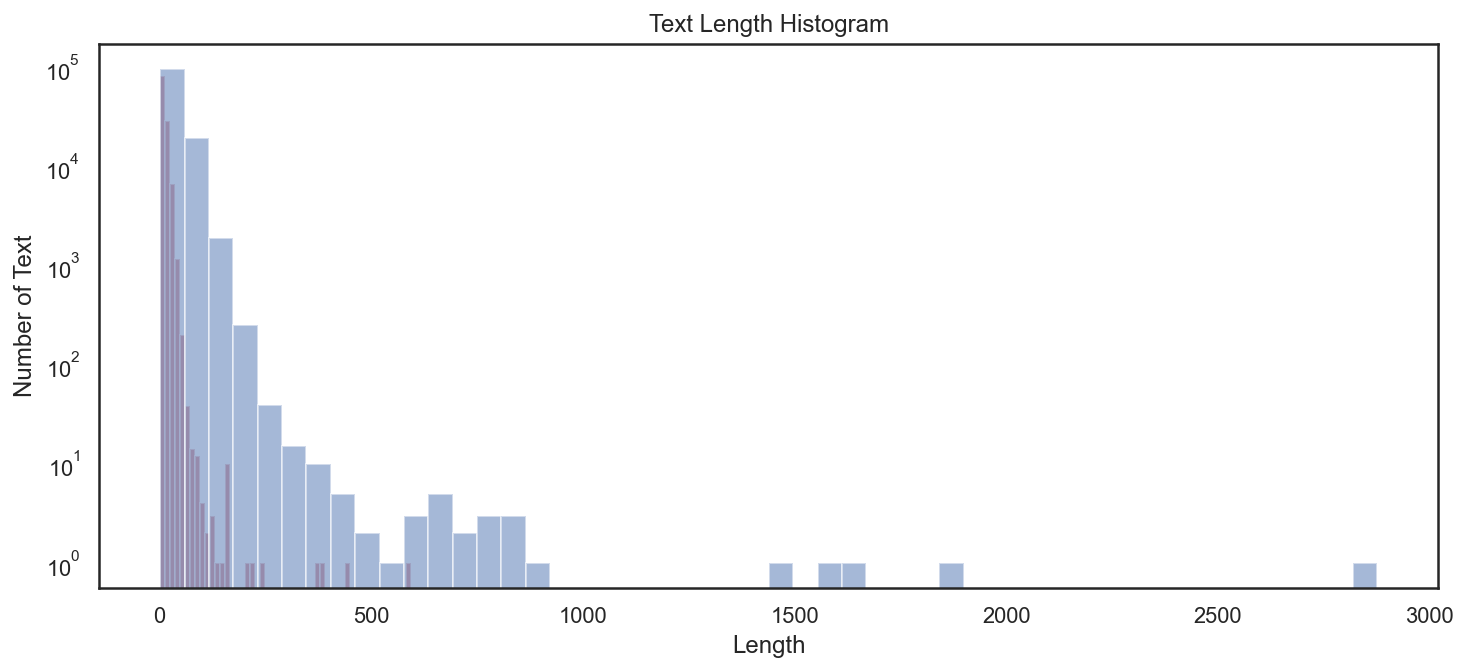

In [24]:
# 문장별 알파벳 및 단어 수 분포

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
plt.title('Text Length Histogram')
plt.xlabel('Length')
plt.ylabel('Number of Text');

In [25]:
# 텍스트 길이에 대한 수치 구하기

import numpy as np

print('텍스트 최대길이: {}'.format(np.max(review_len_by_token)))
print('텍스트 최소길이: {}'.format(np.min(review_len_by_token)))
print('텍스트 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('텍스트 중간길이 : {}'.format(np.median(review_len_by_token)))

print('제 1 사분위 길이 : {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(review_len_by_token, 75)))

텍스트 최대길이: 593
텍스트 최소길이: 1
텍스트 평균길이: 11.44
텍스트 길이 표준편차: 8.33
텍스트 중간길이 : 9.0
제 1 사분위 길이 : 7.0
제 3 사분위 길이 : 14.0


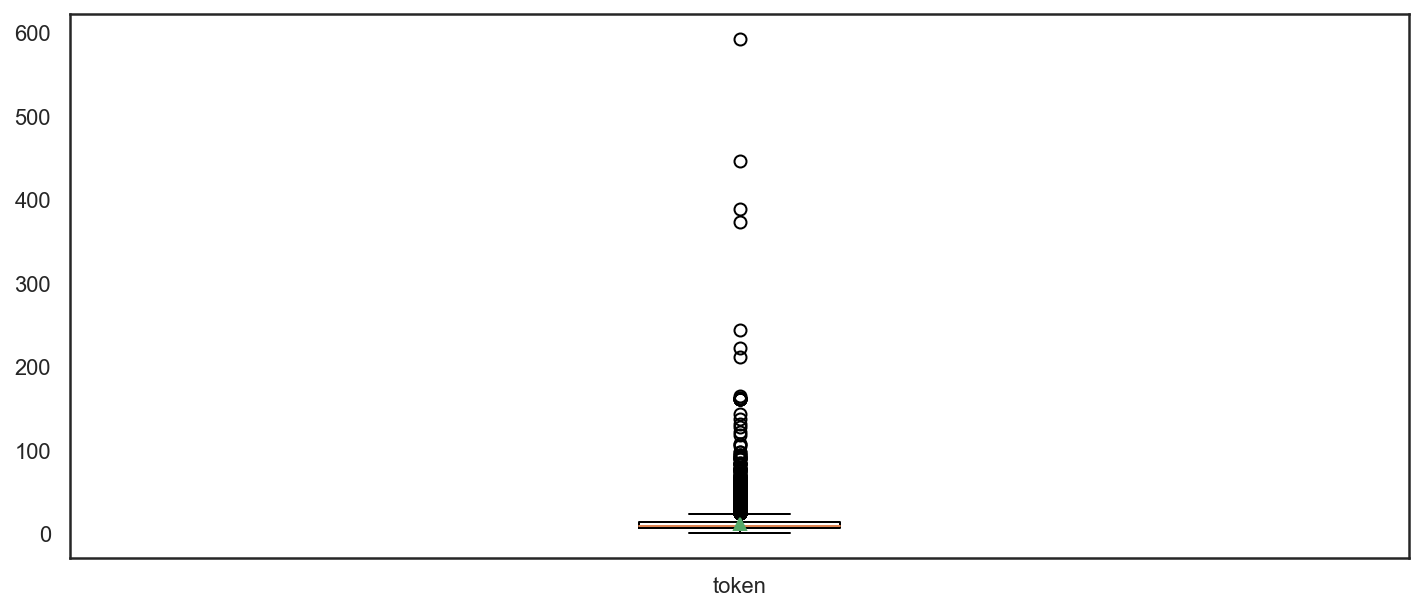

In [26]:
plt.figure(figsize=(12, 5))

plt.boxplot([review_len_by_token],
                labels=['token'],
            showmeans=True);

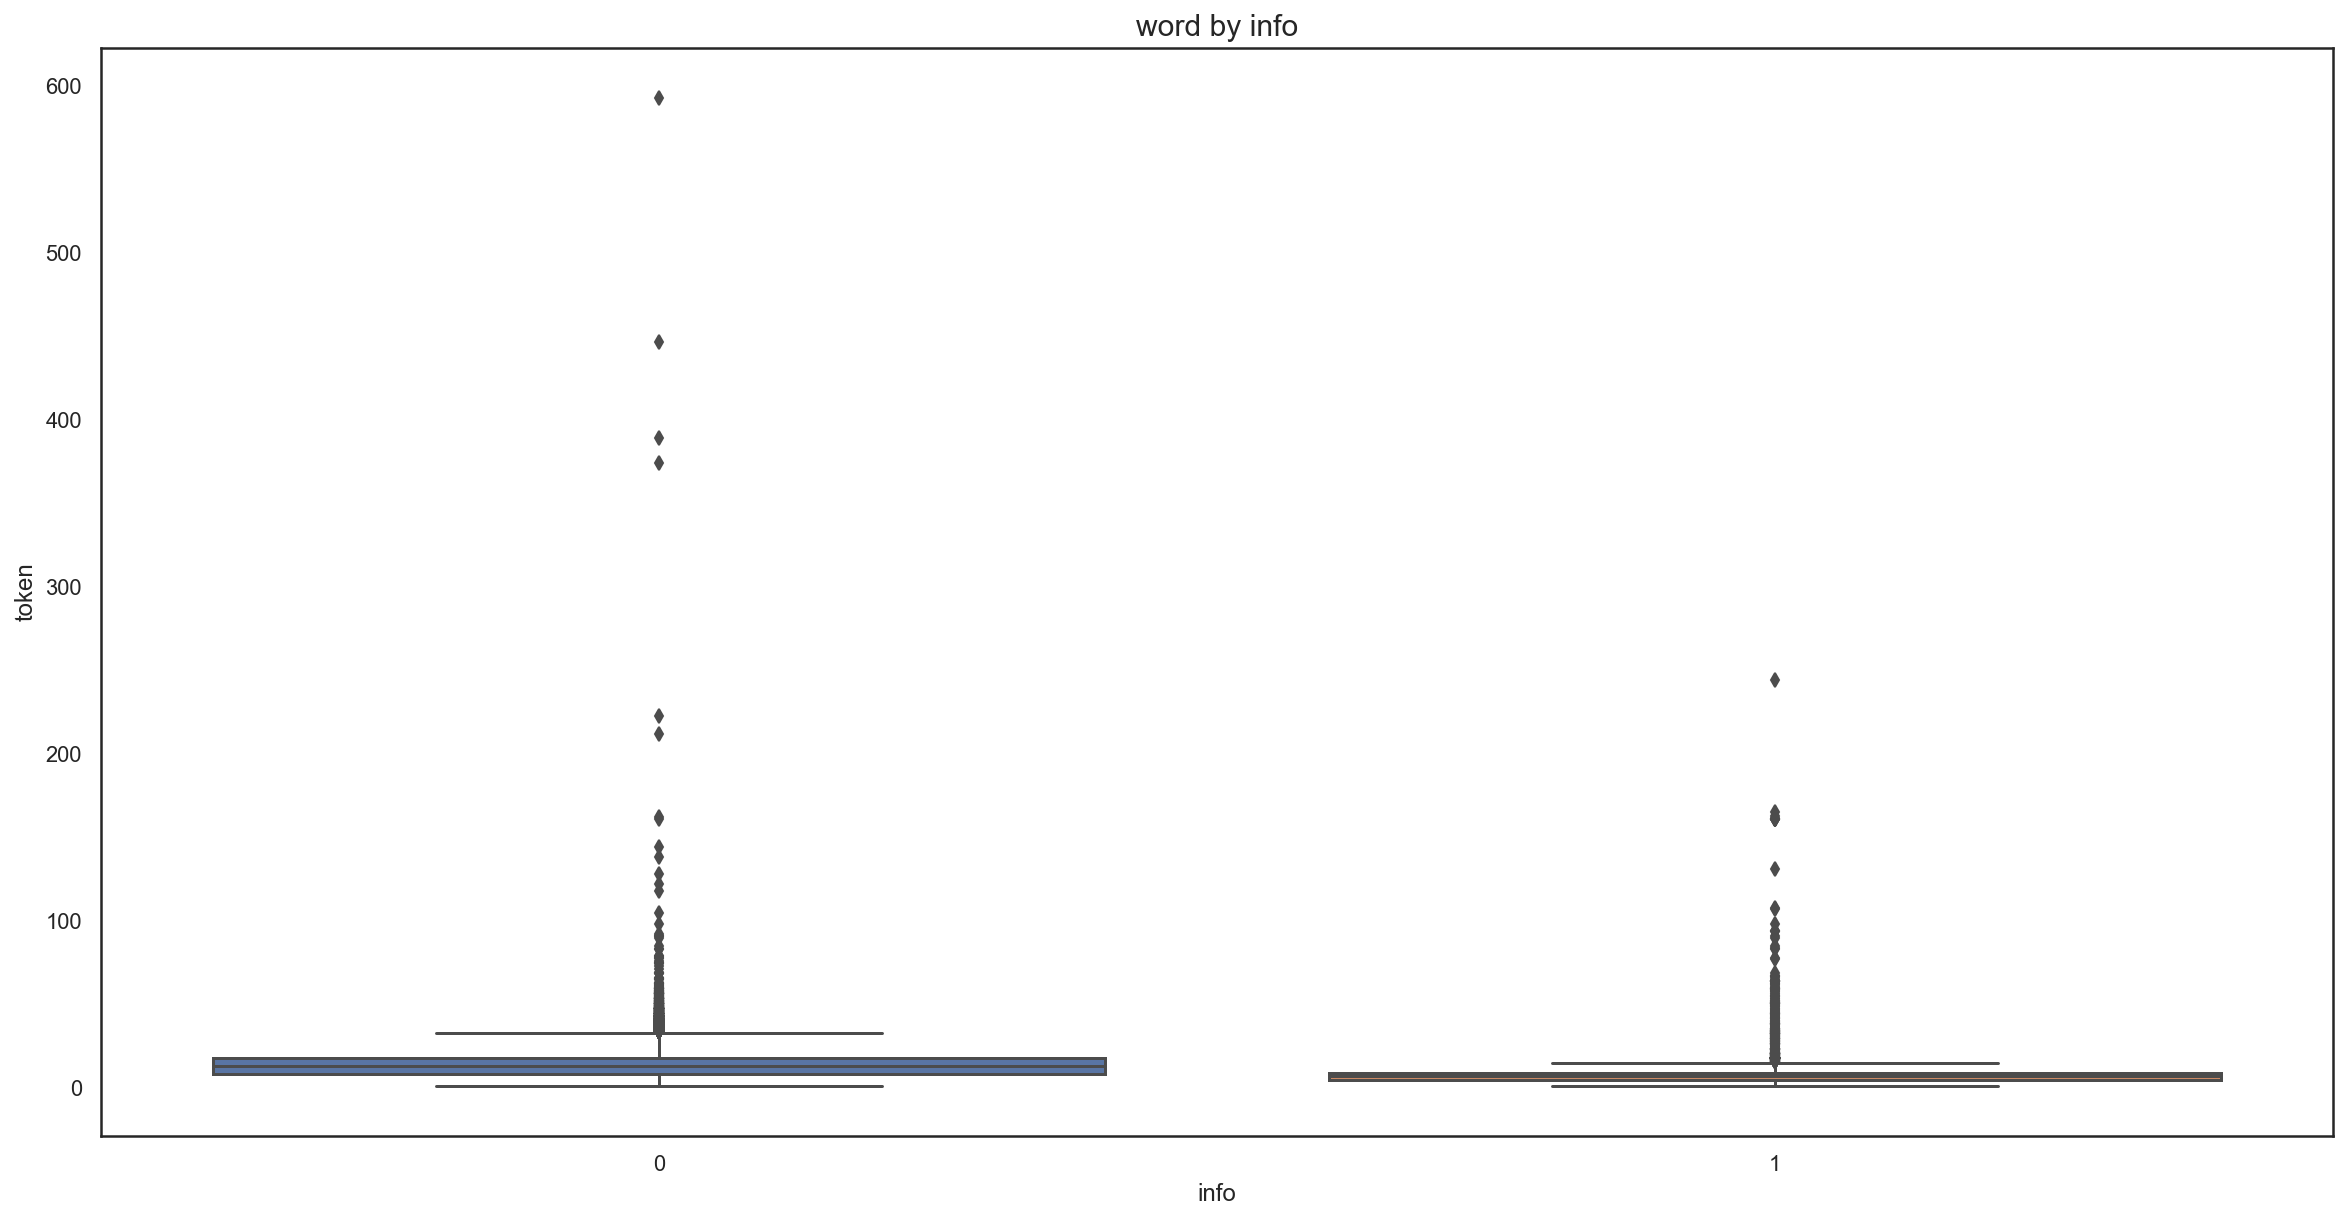

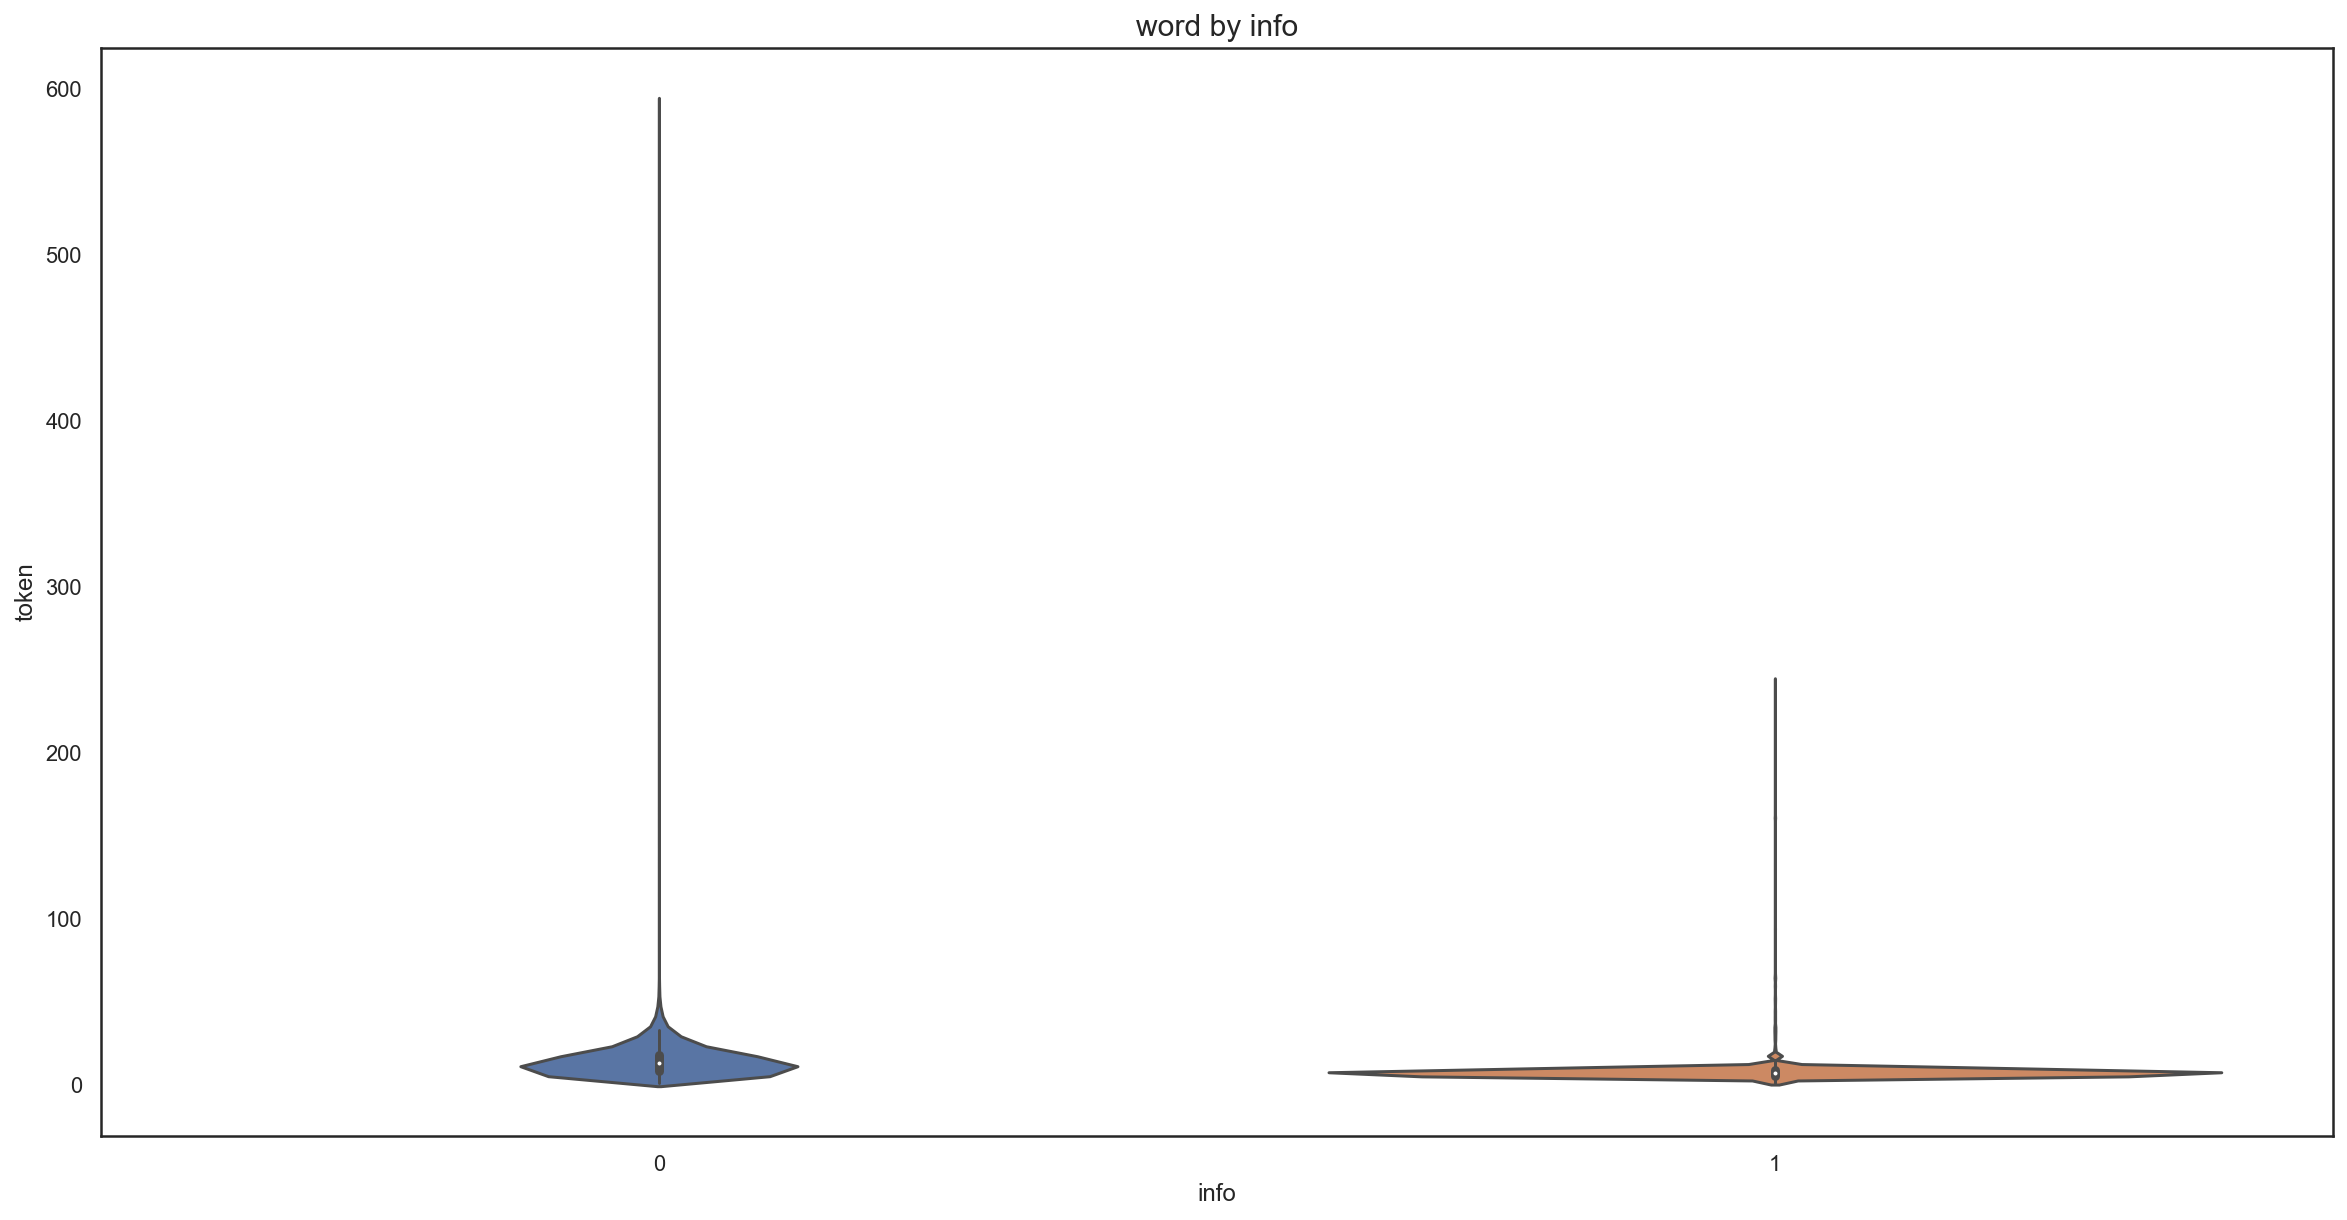

In [31]:
# 정보 및 비정보 별 단어 수 분포에 대한 Box Plot 및 Violin Plot

plt.figure(figsize=(20,10))
sns.boxplot(data=train, x="info", y="token");
plt.title("word by info", fontsize=15)

plt.figure(figsize=(20,10))
sns.violinplot(data=train, x="info", y="token");
plt.title("word by info", fontsize=15)
plt.show()

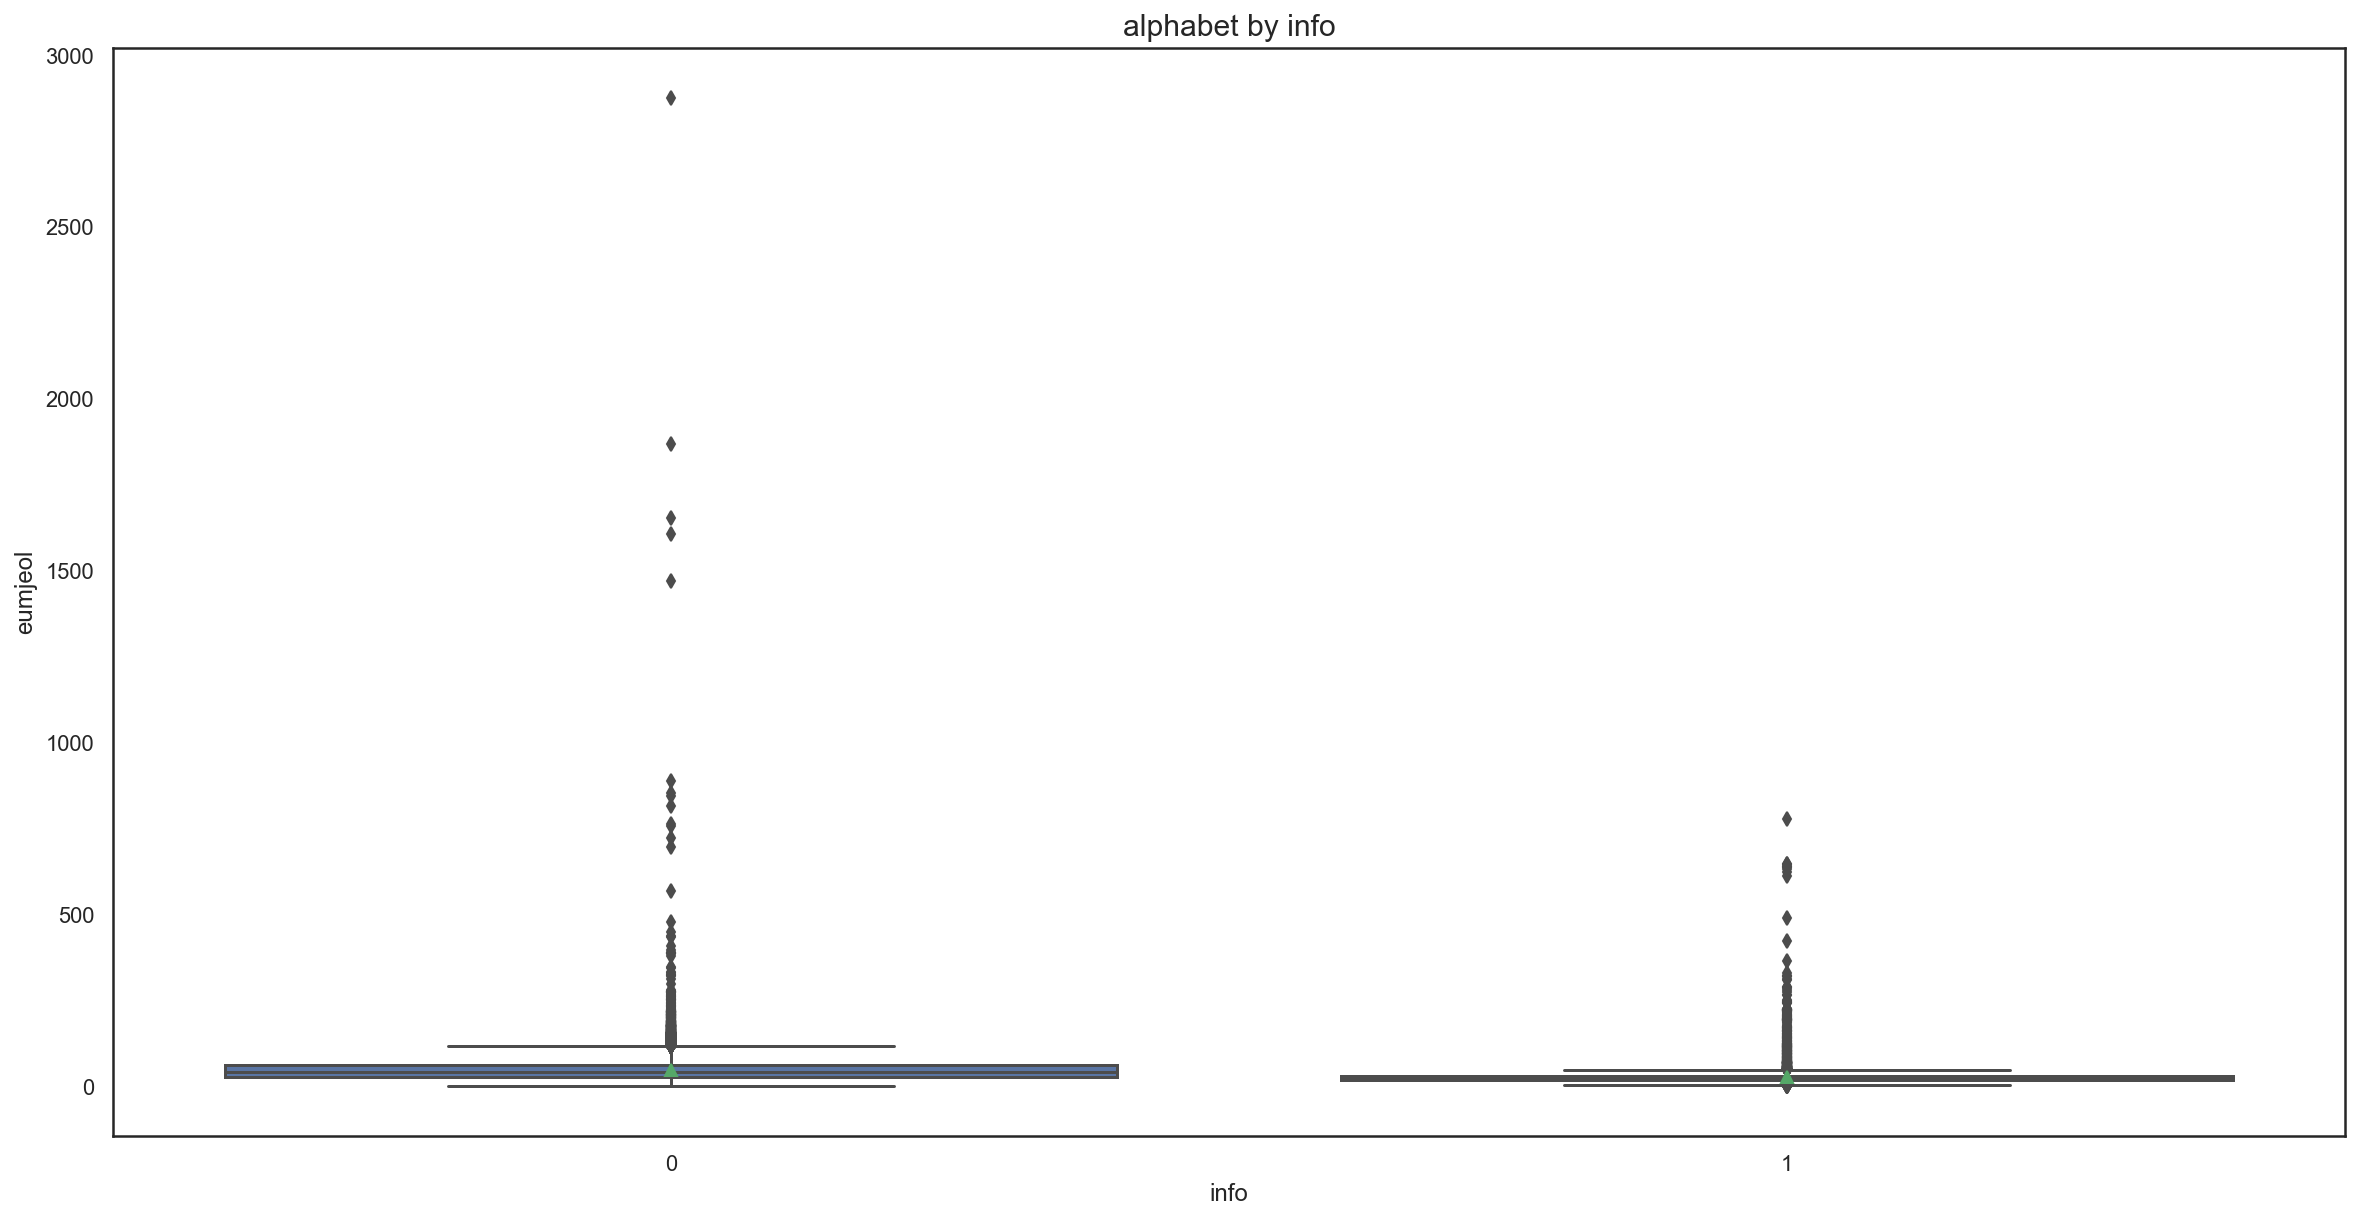

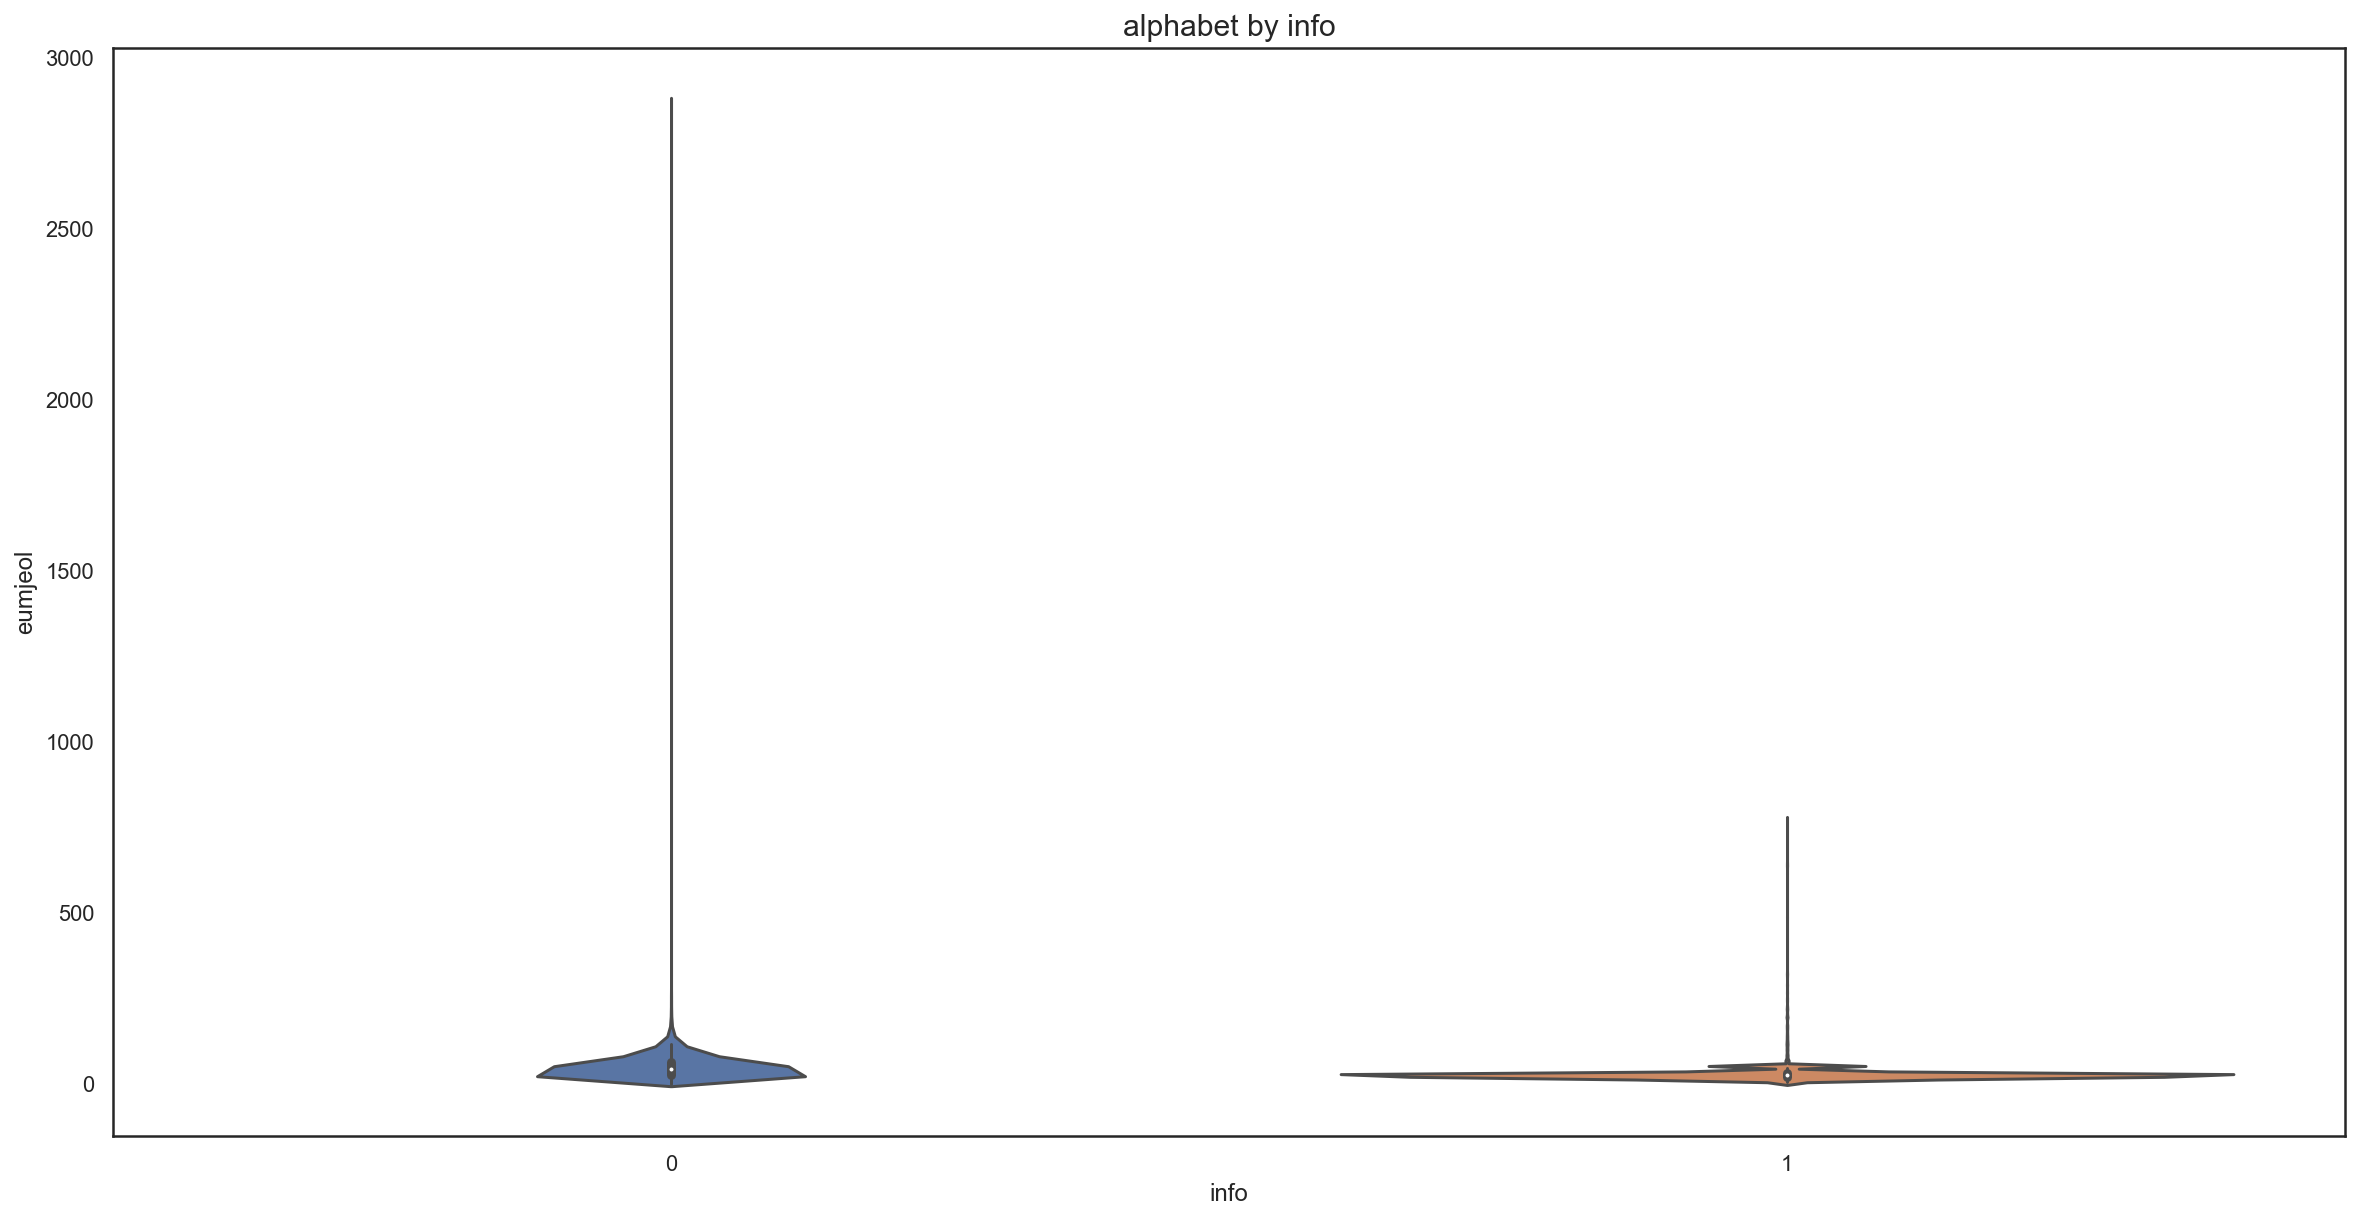

In [30]:
# 작가 별 알파벳 수 분포에 대한 Box Plot 및 Violin Plot

plt.figure(figsize=(20,10))
sns.boxplot(data=train, x="info", y="eumjeol", showmeans=True);
plt.title("alphabet by info", fontsize=15)

plt.figure(figsize=(20,10))
sns.violinplot(data=train, x="info", y="eumjeol", showmeans=True);
plt.title("alphabet by info", fontsize=15)
plt.show()

In [49]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [51]:
text = ' '

for each_line in train['content']:
    text = text + each_line + '\n'

In [52]:
tokens_ko = t.nouns(text)
tokens_ko

['이데일리',
 '현재',
 '코스닥',
 '기관',
 '매도',
 '실적',
 '기반',
 '저가',
 '매집',
 '급등',
 '유망',
 '주',
 '전격',
 '공개',
 '이스',
 '탁론',
 '선취',
 '수수료',
 '월',
 '최저',
 '금리',
 '상품',
 '출시',
 '종합',
 '경제',
 '정보',
 '미디어',
 '이데일리',
 '무단',
 '재',
 '재',
 '배포',
 '금지',
 '전국',
 '소비',
 '붐',
 '조성',
 '기여',
 '예정',
 '이데일리',
 '권오석',
 '기자',
 '중소',
 '벤처기업',
 '부',
 '이하',
 '중',
 '기부',
 '대한민국',
 '동행',
 '일',
 '개',
 '홈쇼핑',
 '사가',
 '홍보',
 '판매',
 '동참',
 '대한민국',
 '동행',
 '일',
 '라이브',
 '커머스',
 '언택트',
 '콘서트',
 '행사',
 '계',
 '등',
 '비',
 '대면',
 '형태',
 '소비',
 '촉진',
 '행사',
 '개',
 '권역',
 '현장',
 '행사',
 '온',
 '오프라인',
 '판촉',
 '홈쇼핑',
 '등',
 '계',
 '행사',
 '통해',
 '소비',
 '심리',
 '진작',
 '위함',
 '이번',
 '동행',
 '일',
 '롯데',
 '공영',
 '현대',
 '홈앤쇼핑',
 '등',
 '개',
 '홈쇼핑',
 '사가',
 '동행',
 '일',
 '홍보',
 '방송',
 '판매',
 '동참',
 '전국',
 '소비',
 '붐',
 '조성',
 '기여',
 '동행',
 '일',
 '기간',
 '중',
 '홈쇼핑',
 '사',
 '판매',
 '방송',
 '사이',
 '영상',
 '방식',
 '통해',
 '행사',
 '취지',
 '메시지',
 '홍보',
 '첫',
 '방송',
 '홈쇼핑',
 '마스크',
 '식기',
 '세트',
 '등',
 '생활용품',
 '신선',
 '식품',
 '등',
 '개',
 '제품',
 '최대',
 '할인',
 '

In [53]:
ko = nltk.Text(tokens_ko, name='content 갯수')

In [55]:
ko.vocab().most_common(100)

[('등', 11585),
 ('종목', 10776),
 ('것', 10437),
 ('한국', 8515),
 ('수', 7686),
 ('가능', 7442),
 ('코로나', 7374),
 ('공개', 6315),
 ('주', 6277),
 ('이', 6275),
 ('이상', 5747),
 ('추천', 5679),
 ('목표', 5498),
 ('투자', 5394),
 ('상한', 4906),
 ('명', 4869),
 ('로', 4796),
 ('주식', 4760),
 ('무료', 4475),
 ('거래', 4453),
 ('재', 4394),
 ('정부', 4288),
 ('바이오', 4226),
 ('및', 4065),
 ('이용', 4001),
 ('금리', 3965),
 ('관련', 3898),
 ('테마', 3791),
 ('최저', 3760),
 ('방', 3742),
 ('실적', 3707),
 ('평가', 3605),
 ('기자', 3463),
 ('수익', 3427),
 ('탁론', 3311),
 ('경제', 3265),
 ('배', 3246),
 ('업계', 3244),
 ('기업', 3212),
 ('위', 3211),
 ('신용', 3195),
 ('카톡', 3133),
 ('말', 3111),
 ('효과', 3076),
 ('급등', 3039),
 ('환', 3036),
 ('오늘', 3035),
 ('위해', 2950),
 ('미수', 2948),
 ('혜주', 2921),
 ('정책', 2912),
 ('당장', 2892),
 ('줄', 2877),
 ('사업', 2870),
 ('지금', 2869),
 ('대장', 2833),
 ('소비자', 2774),
 ('매집', 2747),
 ('스', 2719),
 ('돈', 2695),
 ('연결', 2683),
 ('분', 2682),
 ('다시', 2682),
 ('시대', 2674),
 ('핵심', 2671),
 ('지원', 2665),
 ('확인', 2660),
 ('젠', 

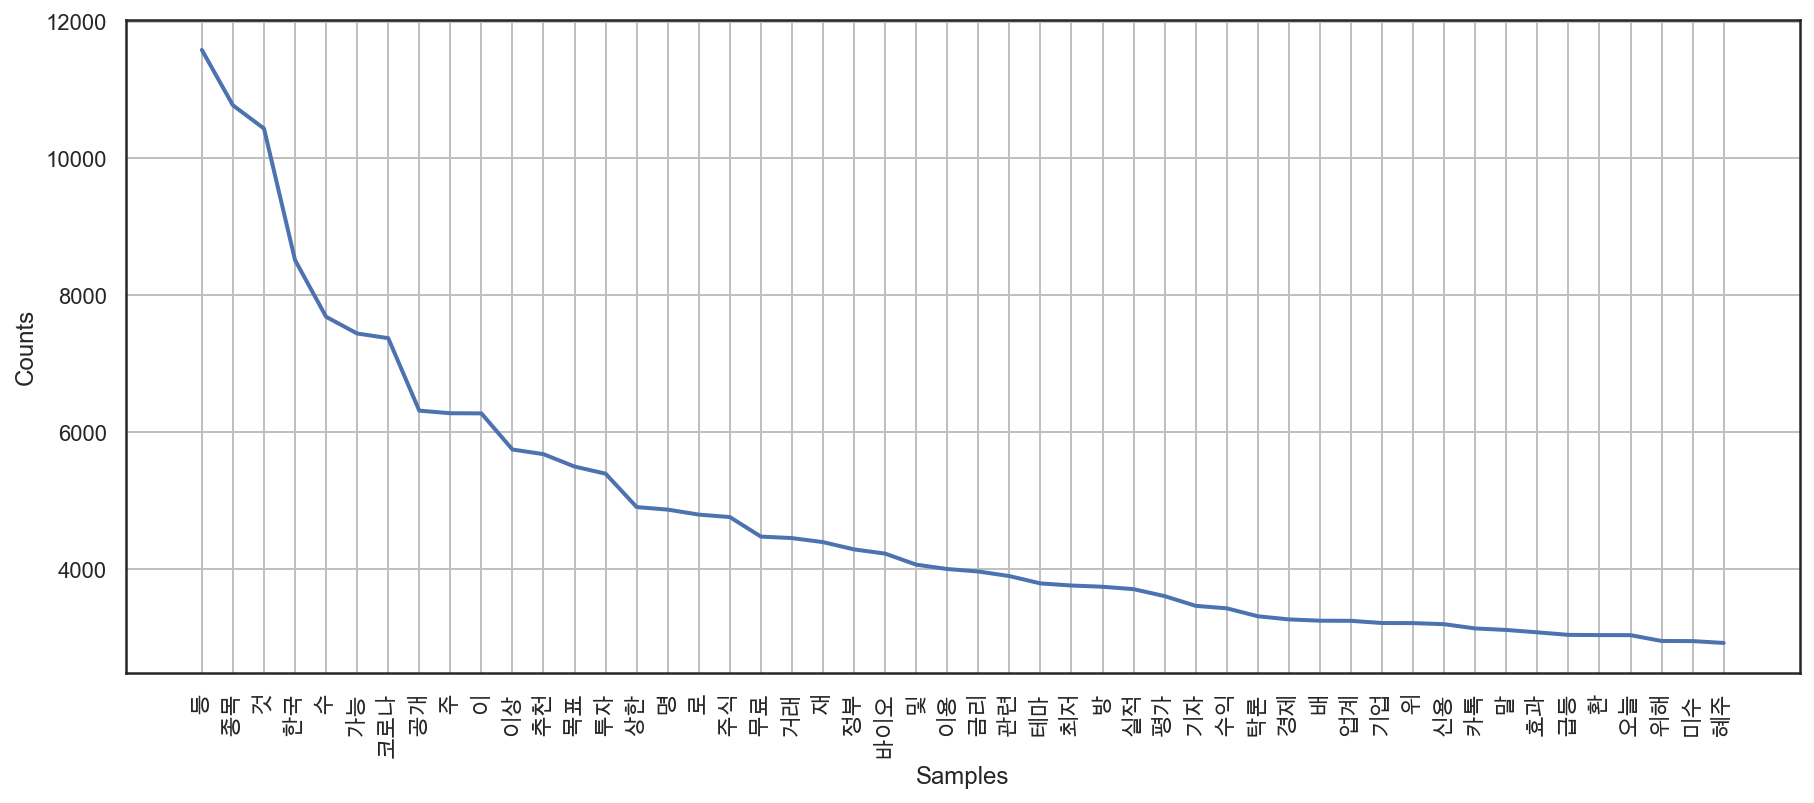

In [56]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [47]:
train['content'] = train['content'].astype('str').str.replace('  ', ' ')

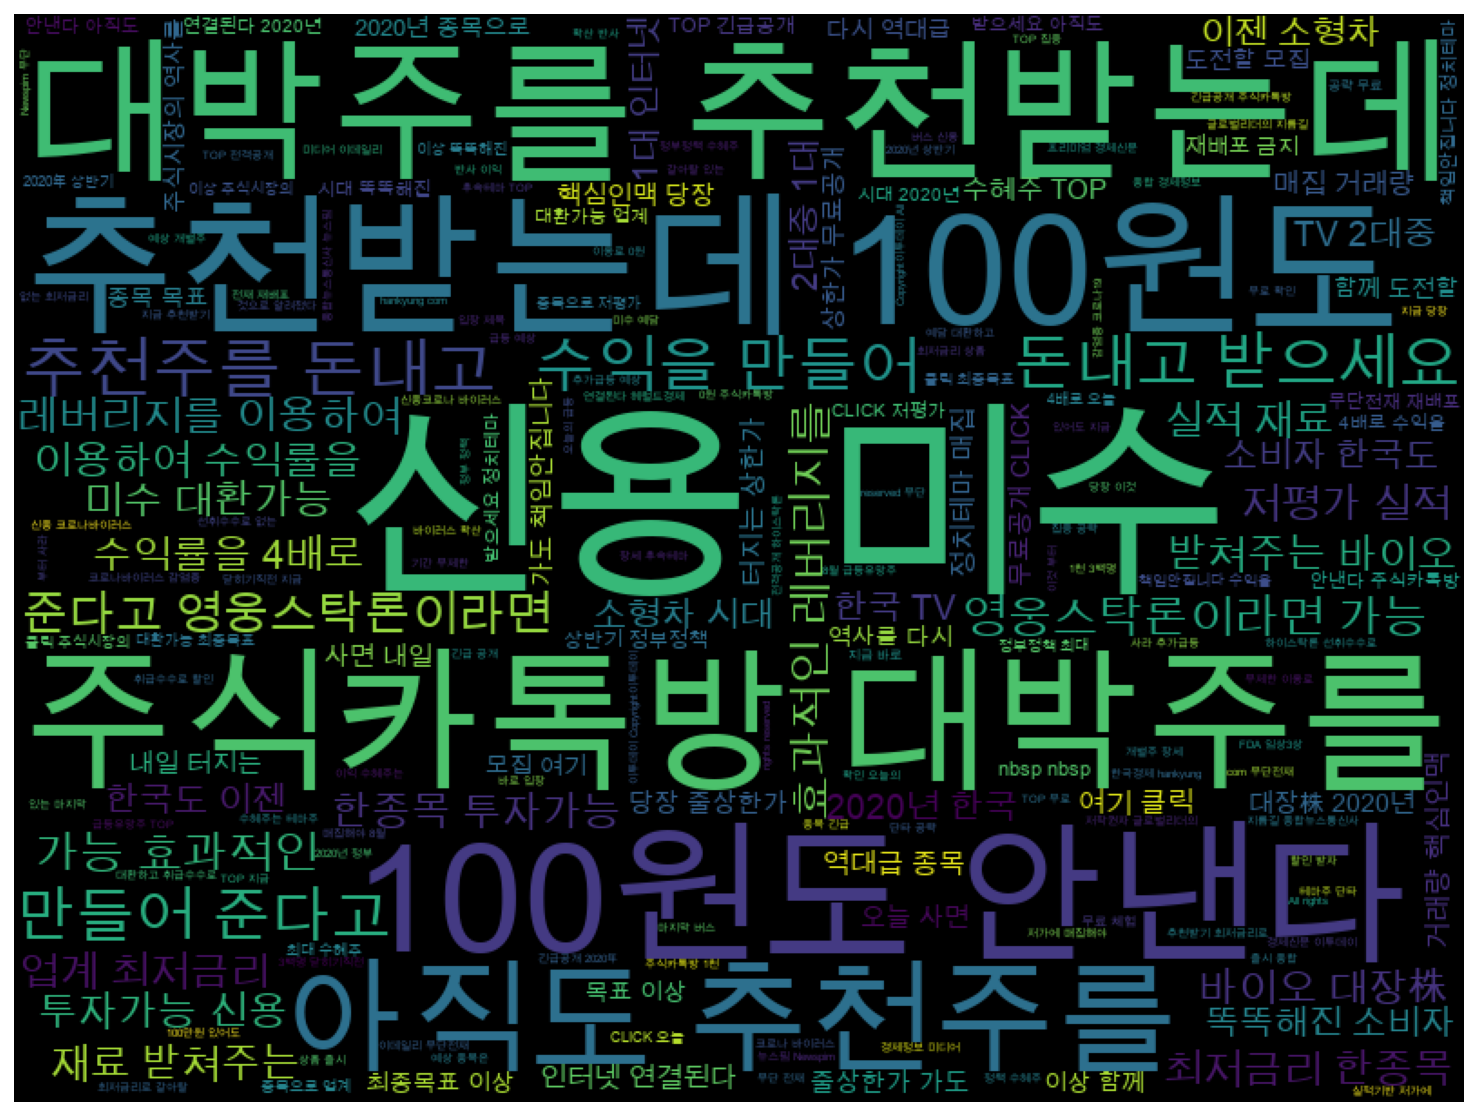

In [48]:
# Word cloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',stopwords = STOPWORDS, background_color = 'black',
                     width = 800,
                     height = 600).generate(' '.join(train['content']))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

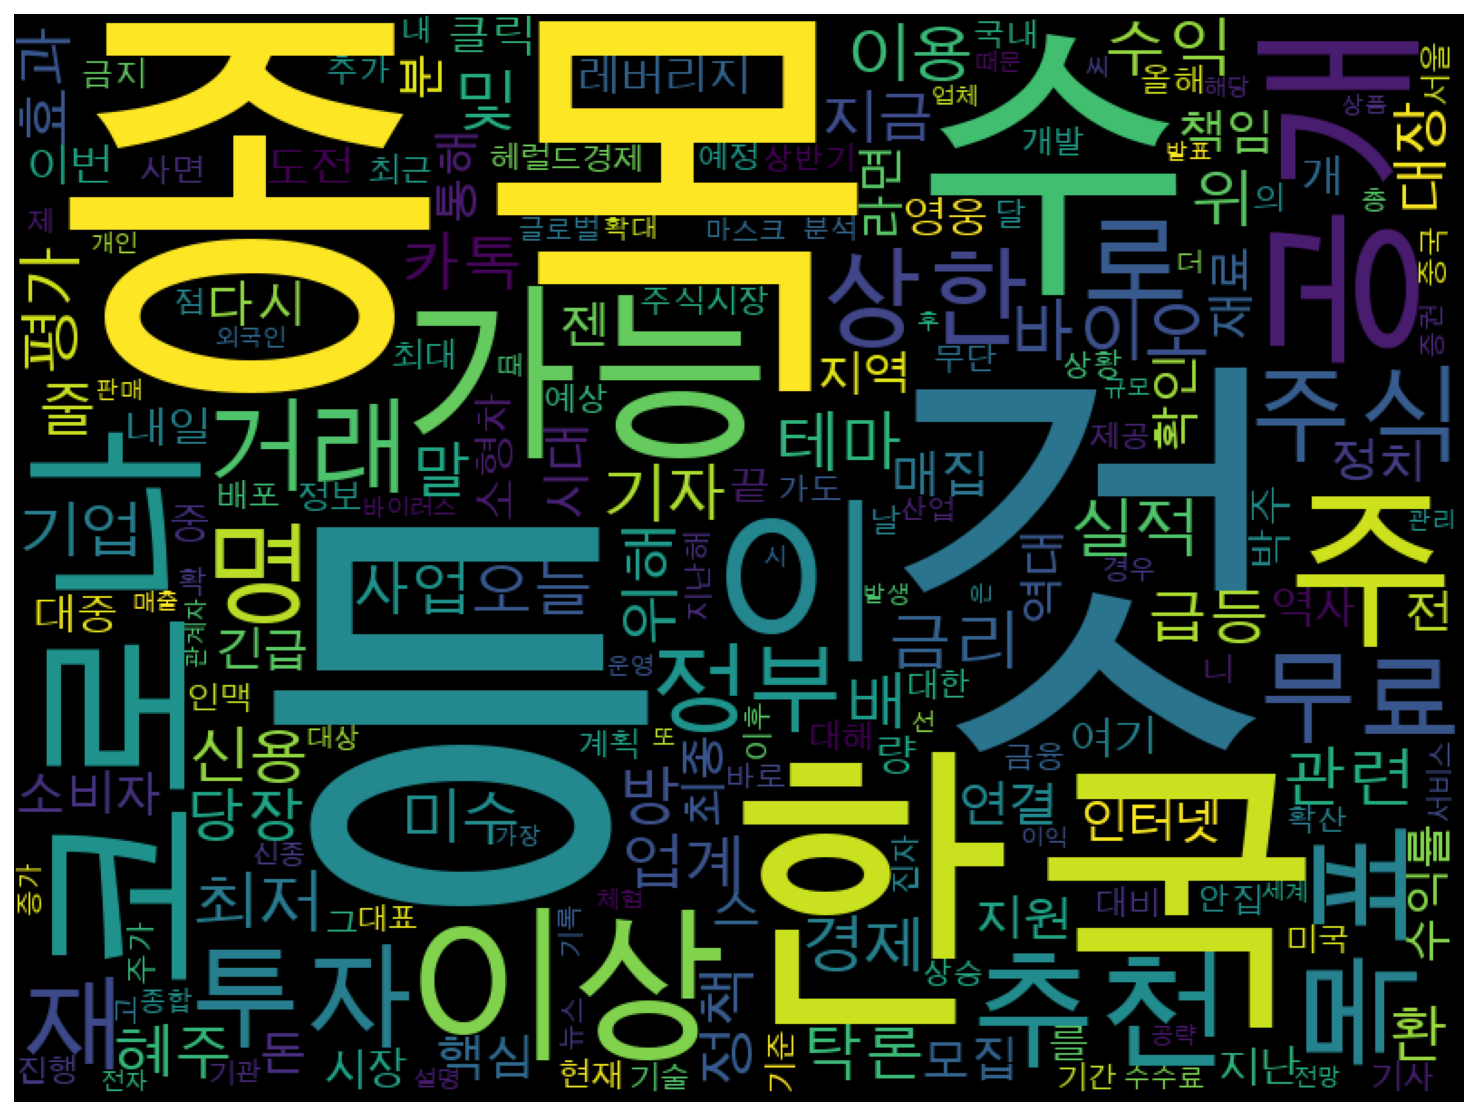

In [58]:
# Word cloud

data = ko.vocab().most_common(300)

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',stopwords = STOPWORDS, background_color = 'black',
                     width = 800,
                     height = 600).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Count Vectorizer 후 진행

In [12]:
X = train.loc[:, 'content']
y = train.loc[:, 'info']

In [13]:
X

0         [이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도
1              "실적기반" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개
2                  하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시
3                   종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지
4                               전국적인 소비 붐 조성에 기여할 예정
                             ...                    
118740           미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.
118741                       똑똑해진 소비자..한국도 이젠 소형차 시대
118742                       똑똑해진 소비자..한국도 이젠 소형차 시대
118743                   2020년 한국 TV 2대중 1대 인터넷 연결된다
118744                   2020년 한국 TV 2대중 1대 인터넷 연결된다
Name: content, Length: 118745, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Count Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = CountVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
mu_clf = MultinomialNB().fit(X_train_tfidf_vect, y_train)

In [17]:
# 정식으로 pipeline을 만들고

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [13]:
# 학습 후 train, test accuracy score 적용

from sklearn.metrics import accuracy_score

mu_clf.fit(X_train_tfidf_vect, y_train)

train_pred = mu_clf.predict(X_train_tfidf_vect)
test_pred = mu_clf.predict(X_test_tfidf_vect)

print('MultinomialNB train accuracy score:', accuracy_score(y_train, train_pred))
print('MultinomialNB test accuracy score:', accuracy_score(y_test, test_pred))
# predicted = text_clf.predict(X_test)

# np.mean(predicted == y_test)


MultinomialNB train accuracy score: 0.9793675523179923
MultinomialNB test accuracy score: 0.9664406922396732


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_train, train_pred))
print('-----------'*5)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     57478
           1       0.99      0.96      0.97     37518

    accuracy                           0.98     94996
   macro avg       0.98      0.98      0.98     94996
weighted avg       0.98      0.98      0.98     94996

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14335
           1       0.99      0.93      0.96      9414

    accuracy                           0.97     23749
   macro avg       0.97      0.96      0.96     23749
weighted avg       0.97      0.97      0.97     23749



In [23]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


models = []
models.append(('LogisticRegression', LogisticRegression(random_state=13)))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=13, n_jobs=-1)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)))
#models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13)))
#models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=13)))
#models.append(('LGBMClassifier', LGBMClassifier(random_state=13)))
#models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5, n_jobs=-1)))
#models.append(('LinearSVC', LinearSVC(C=1, loss='hinge', random_state=13)))
#models.append(('XgBoost', XGBClassifier(learning_rate=0.1, max_depth=3, random_state=13, n_jobs=-1)))
#models.append(('RidgeClassifier', RidgeClassifier(random_state=13)))
#models.append(('SGDClassifier', SGDClassifier(random_state=13, loss='modified_huber')))

In [24]:
models

[('LogisticRegression', LogisticRegression(random_state=13)),
 ('MultinomialNB', MultinomialNB()),
 ('RandomForestClassifier',
  RandomForestClassifier(n_jobs=-1, random_state=13))]

In [25]:
from sklearn.metrics import accuracy_score

train_score = []
test_score = []
names = []

for name, model in models:
    clf = model
    clf.fit(X_train_tfidf_vect, y_train)
    
    train_pred = clf.predict(X_train_tfidf_vect)
    test_pred = clf.predict(X_test_tfidf_vect)
    
    names.append(name)
    train_score.append(accuracy_score(y_train, train_pred))
    test_score.append(accuracy_score(y_test, test_pred))

In [26]:
result = pd.DataFrame({'model name': names,
                       'train score': train_score,
                       'test score': test_score})
result['diff'] = result['train score'] - result['test score']
result.sort_values(by='train score', ascending=False).reset_index(drop=True)

,model name,train score,test score,diff
0,RandomForestClassifier,0.999726,0.975241,0.024485
1,LogisticRegression,0.996379,0.977346,0.019032
2,MultinomialNB,0.979368,0.966441,0.012927


In [27]:
result.round(2).sort_values(by='test score', ascending=False)

,model name,train score,test score,diff
0,LogisticRegression,1.00,0.98,0.02
2,RandomForestClassifier,1.00,0.98,0.02
1,MultinomialNB,0.98,0.97,0.01


In [99]:
train

,n_id,date,title,content,ord,info,reviews,eumjeol,token
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,"[[이데일리, MARKETPOINT]15:32, 현재, 코스닥, 기관, 678억, ...",36,7
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"[""실적기반"", 저가에, 매집해야, 할, 8월, 급등유망주, TOP, 5, 전격공개]",29,9
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"[하이스탁론,, 선취수수료, 없는, 월, 0.4%, 최저금리, 상품, 출시]",26,8
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,"[종합, 경제정보, 미디어, 이데일리, -, 무단전재, &, 재배포, 금지]",24,9
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"[전국적인, 소비, 붐, 조성에, 기여할, 예정]",15,6
...,...,...,...,...,...,...,...,...,...
118740,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,48,1,"[미, FDA, 임상3상, 허가, 임박., 묻고, 따블로, 갈, 바이오, 황제주.]",26,10
118741,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,49,1,"[똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]",19,5
118742,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,50,1,"[똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]",19,5
118743,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,51,1,"[2020년, 한국, TV, 2대중, 1대, 인터넷, 연결된다]",21,7


#### 예측이 틀린 데이터 확인

In [100]:
test_pred

array([1, 1, 1, ..., 0, 0, 1])

In [101]:
df = pd.DataFrame(X_test)
df['pred']=test_pred.tolist()
df['info']=y_test
df

,content,pred,info
68049,10%수익을 40%로 만들어 준다고.. 영웅스탁론이라면 가능~.효과적인 레버리지를 ...,1,1
73467,10%수익을 40%로 만들어 준다고.. 영웅스탁론이라면 가능~.효과적인 레버리지를 ...,1,1
107637,아직도 추천주를 돈내고 받으세요.,1,1
87415,업계 최저금리 2.29%. 100%한종목 투자가능+신용/ 미수 대환가능,1,1
7323,1분가량의 짧은 영상에 결혼식·집꾸미기·홈트레이닝 등 다양한 테마에 맞춰 여러 가지...,0,0
...,...,...,...
67604,아이와 함께 집에서 시간을 보낼 수 있는 동시에 간식도 해결할 수 있다는 이점이 있다,0,0
116638,전날 이후 '완치자 격리자' 지속,0,0
2183,이날 이란이 미국이 거셈 솔레이마니 이슬람혁명수비대 쿠스드 사령관을 폭사한 것에 대...,0,0
61259,신청자격은 인천소재 MICE 기업으로 창업 7년 이하의 개인사업자(예비창업자 포함)...,0,0


In [102]:
# 예측이 틀린 Content

df_x = df[df['pred'] != df['info']]
df_x

,content,pred,info
54748,"광주 코로나 확진자 발생, 서구 지역 30대 남성신천지 대구교회 방문 이력",0,1
54334,"한신평, 티시스 신용등급 A- 신규 평가",0,1
48189,*20.06.01 삼천리자전거 (024950) 上 적중,1,0
41082,총기를 소유할 수 없는 한국이라 참 다행입니다,1,0
7464,"주식시장에서 손실을 보았다고, 단순 보유주식으로 묵혀둔다고 원금이 회복되지 않습니다...",0,1
...,...,...,...
41759,中 관세인하 효과3대지수 사상최고,0,1
42273,"셀트리온제약, 주가 13만 8100원.. 전일대비 11.1%",0,1
38089,"경찰, 이태원 클럽 등 방문 1316명 위치정보 방역당국에 제공",0,1
36882,"삼성카드, 지난해 4Q 영업익 1036억원전년비 1.3%",0,1


In [103]:
a = (23749-797)/23749
a

0.9664406922396732

In [104]:
#  예측인 틀린 content의 갯수

df_x2 = pd.DataFrame(df_x['content'].value_counts()).reset_index()
df_x2.head(50)

,index,content
0,종목 이슈,13
1,&nbsp;,7
2,데이터에서 찾은 AI 속보,4
3,"모텔에서 스마트폰 조심.""이미 다 알고 있다""",3
4,"미래산업, 50대 1 감자결정",2
5,[오늘의 관심주],2
6,허벅지 둘레가 1cm 줄면놀라운 결과,2
7,"트럼프, 뒤늦게 알고 일본에 '격노'",2
8,"DLF·라임사태 왜 못 막았나감사원, 금감원 책임 묻는다",2
9,매일 2회 휴대폰으로 개별전송해드립니다.],2


In [105]:
# 예측인 틀린것 중 비정보와 정보의 갯수
df_x3 = pd.DataFrame(df_x['info'].value_counts()).reset_index()
df_x3

,index,info
0,1,672
1,0,125


### Tfidf Vectorizer 후 진행

In [59]:
X = train.loc[:, 'content']
y = train.loc[:, 'info']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

In [62]:
from sklearn.naive_bayes import MultinomialNB
mu_clf = MultinomialNB().fit(X_train_tfidf_vect, y_train)

In [63]:
# 정식으로 pipeline을 만들고

from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [64]:
# 학습 후 train, test accuracy score 적용

from sklearn.metrics import accuracy_score

mu_clf.fit(X_train_tfidf_vect, y_train)

train_pred = mu_clf.predict(X_train_tfidf_vect)
test_pred = mu_clf.predict(X_test_tfidf_vect)

print('MultinomialNB train accuracy score:', accuracy_score(y_train, train_pred))
print('MultinomialNB test accuracy score:', accuracy_score(y_test, test_pred))

MultinomialNB train accuracy score: 0.9750305276011622
MultinomialNB test accuracy score: 0.9629879152806434


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_train, train_pred))
print('-----------'*5)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     57478
           1       0.99      0.94      0.97     37518

    accuracy                           0.98     94996
   macro avg       0.98      0.97      0.97     94996
weighted avg       0.98      0.98      0.97     94996

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14335
           1       0.99      0.91      0.95      9414

    accuracy                           0.96     23749
   macro avg       0.97      0.95      0.96     23749
weighted avg       0.96      0.96      0.96     23749



### Tfidf Vectorizer Tunning

In [69]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), min_df=0.001, 
                             max_df=0.1, smooth_idf=False)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


models = []
models.append(('LogisticRegression', LogisticRegression(random_state=13)))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=13, n_jobs=-1)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=13)))
models.append(('LGBMClassifier', LGBMClassifier(random_state=13)))
models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5, n_jobs=-1)))
models.append(('LinearSVC', LinearSVC(C=1, loss='hinge', random_state=13)))
models.append(('XgBoost', XGBClassifier(learning_rate=0.1, max_depth=3, random_state=13, n_jobs=-1)))
models.append(('RidgeClassifier', RidgeClassifier(random_state=13)))
models.append(('SGDClassifier', SGDClassifier(random_state=13, loss='modified_huber')))

In [71]:
models

[('LogisticRegression', LogisticRegression(random_state=13)),
 ('MultinomialNB', MultinomialNB()),
 ('RandomForestClassifier',
  RandomForestClassifier(n_jobs=-1, random_state=13)),
 ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)),
 ('AdaBoostClassifier', AdaBoostClassifier(random_state=13)),
 ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=13)),
 ('LGBMClassifier', LGBMClassifier(random_state=13)),
 ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
 ('LinearSVC', LinearSVC(C=1, loss='hinge', random_state=13)),
 ('XgBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=0.1, max_delta_step=None, max_depth=3,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=-

In [72]:
from sklearn.metrics import accuracy_score

train_score = []
test_score = []
names = []

for name, model in models:
    clf = model
    clf.fit(X_train_tfidf_vect, y_train)
    
    train_pred = clf.predict(X_train_tfidf_vect)
    test_pred = clf.predict(X_test_tfidf_vect)
    
    names.append(name)
    train_score.append(accuracy_score(y_train, train_pred))
    test_score.append(accuracy_score(y_test, test_pred))

In [73]:
result = pd.DataFrame({'model name': names,
                       'train score': train_score,
                       'test score': test_score})
result['diff'] = result['train score'] - result['test score']
result.sort_values(by='train score', ascending=False).reset_index(drop=True)

,model name,train score,test score,diff
0,RandomForestClassifier,0.969967,0.956798,0.013169
1,DecisionTreeClassifier,0.969967,0.952798,0.017169
2,LinearSVC,0.951998,0.948545,0.003453
3,LogisticRegression,0.950377,0.947366,0.003011
4,SGDClassifier,0.950072,0.947114,0.002958
5,LGBMClassifier,0.948640,0.945513,0.003126
6,KNeighborsClassifier,0.948387,0.934229,0.014158
7,RidgeClassifier,0.947145,0.944292,0.002853
8,MultinomialNB,0.931850,0.929008,0.002842
9,AdaBoostClassifier,0.924944,0.924292,0.000653


In [75]:
result.round(2).sort_values(by='test score', ascending=False)

,model name,train score,test score,diff
2,RandomForestClassifier,0.97,0.96,0.01
0,LogisticRegression,0.95,0.95,0.00
3,DecisionTreeClassifier,0.97,0.95,0.02
6,LGBMClassifier,0.95,0.95,0.00
8,LinearSVC,0.95,0.95,0.00
11,SGDClassifier,0.95,0.95,0.00
10,RidgeClassifier,0.95,0.94,0.00
1,MultinomialNB,0.93,0.93,0.00
7,KNeighborsClassifier,0.95,0.93,0.01
4,AdaBoostClassifier,0.92,0.92,0.00


### RNN 적용

In [3]:
train

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
...,...,...,...,...,...,...
118740,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,48,1
118741,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,49,1
118742,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,50,1
118743,NEWS01333,20200117,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,51,1


In [25]:
y = np.array([train['info']])
y = np.reshape(y, (118745, 1))
y.shape

(118745, 1)

In [27]:
print(y)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [37]:
train_text = train.content.str.split(' ')
train_text

0         [[이데일리, MARKETPOINT]15:32, 현재, 코스닥, 기관, 678억, ...
1           ["실적기반", 저가에, 매집해야, 할, 8월, 급등유망주, TOP, 5, 전격공개]
2                [하이스탁론,, 선취수수료, 없는, 월, 0.4%, 최저금리, 상품, 출시]
3                [종합, 경제정보, 미디어, 이데일리, -, 무단전재, &, 재배포, 금지]
4                               [전국적인, 소비, 붐, 조성에, 기여할, 예정]
                                ...                        
118740       [미, FDA, 임상3상, 허가, 임박., 묻고, 따블로, 갈, 바이오, 황제주.]
118741                        [똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]
118742                        [똑똑해진, 소비자..한국도, 이젠, 소형차, 시대]
118743                  [2020년, 한국, TV, 2대중, 1대, 인터넷, 연결된다]
118744                  [2020년, 한국, TV, 2대중, 1대, 인터넷, 연결된다]
Name: content, Length: 118745, dtype: object

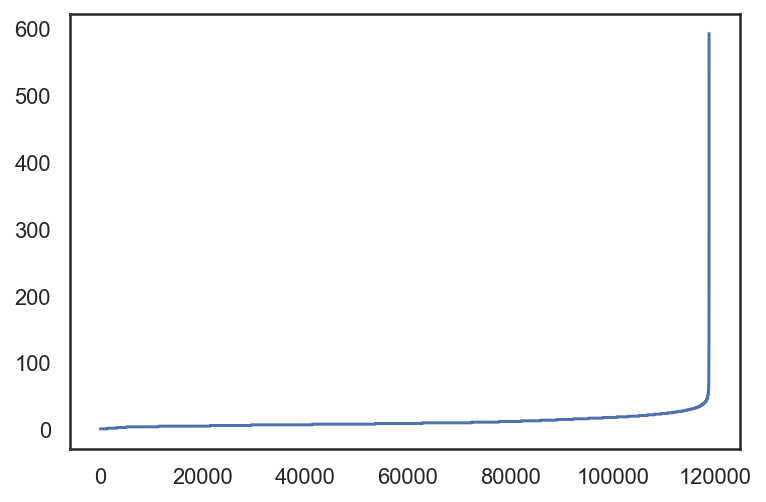

111640


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

sentence_len = [len(sentence) for sentence in train_text]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [48]:
sentences_new = []
for sentence in train_text:
    sentences_new.append([word[:5] for word in sentence][:25])
    
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['[이데일리', 'MARKE', '현재', '코스닥', '기관', '678억', '순매도']
['"실적기반', '저가에', '매집해야', '할', '8월', '급등유망주', 'TOP', '5', '전격공개']
['하이스탁론', '선취수수료', '없는', '월', '0.4%', '최저금리', '상품', '출시']
['종합', '경제정보', '미디어', '이데일리', '-', '무단전재', '&', '재배포', '금지']
['전국적인', '소비', '붐', '조성에', '기여할', '예정']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
X = tokenizer.texts_to_sequences(sentences)

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 3000, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
model.summary()

NameError: name 'tf' is not defined